In [77]:
# Question 1
from matplotlib import pyplot as plt
import numpy as np


import pandas as pd
users = pd.read_csv("D:/Python/User.csv", delimiter='|')
print(users)

     user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]


In [5]:
# mean age as per occupation
users.groupby('occupation')['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [6]:
# number of male ratio as per occupation
df = users['gender'].eq('M').groupby(users['occupation']).mean().reset_index(name='ratio')
df=df.sort_values('ratio',ascending=[False])
print(df)

       occupation     ratio
2          doctor  1.000000
4        engineer  0.970149
19     technician  0.962963
15        retired  0.928571
14     programmer  0.909091
6       executive  0.906250
17      scientist  0.903226
5   entertainment  0.888889
9          lawyer  0.833333
16       salesman  0.750000
3        educator  0.726316
18        student  0.693878
13          other  0.657143
11      marketing  0.615385
20         writer  0.577778
12           none  0.555556
0   administrator  0.544304
1          artist  0.535714
10      librarian  0.431373
7      healthcare  0.312500
8       homemaker  0.142857


In [7]:
# For each occupation, calculate the minimum and maximum ages
users.groupby('occupation').agg(

    {

        "age": ["min", "max"]

    }

)

age    
              min max
occupation           
administrator  21  70
artist         19  48
doctor         28  64
educator       23  63
engineer       22  70
entertainment  15  50
executive      22  69
healthcare     22  62
homemaker      20  50
lawyer         21  53
librarian      23  69
marketing      24  55
none           11  55
other          13  64
programmer     20  63
retired        51  73
salesman       18  66
scientist      23  55
student         7  42
technician     21  55
writer         18  60

In [8]:
# For each combination of occupation and sex, calculate the mean age
users.groupby(['gender','occupation'])['age'].mean()

gender  occupation   
F       administrator    40.638889
        artist           30.307692
        educator         39.115385
        engineer         29.500000
        entertainment    31.000000
        executive        44.000000
        healthcare       39.818182
        homemaker        34.166667
        lawyer           39.500000
        librarian        40.000000
        marketing        37.200000
        none             36.500000
        other            35.472222
        programmer       32.166667
        retired          70.000000
        salesman         27.000000
        scientist        28.333333
        student          20.750000
        technician       38.000000
        writer           37.631579
M       administrator    37.162791
        artist           32.333333
        doctor           43.571429
        educator         43.101449
        engineer         36.600000
        entertainment    29.000000
        executive        38.172414
        healthcare       45.40000

In [9]:
#For each occupation present the percentage of women and men
df1 = pd.crosstab(users['occupation'], users['gender'], normalize=0).round(4)*100
print(df1 )

gender             F       M
occupation                  
administrator  45.57   54.43
artist         46.43   53.57
doctor          0.00  100.00
educator       27.37   72.63
engineer        2.99   97.01
entertainment  11.11   88.89
executive       9.38   90.62
healthcare     68.75   31.25
homemaker      85.71   14.29
lawyer         16.67   83.33
librarian      56.86   43.14
marketing      38.46   61.54
none           44.44   55.56
other          34.29   65.71
programmer      9.09   90.91
retired         7.14   92.86
salesman       25.00   75.00
scientist       9.68   90.32
student        30.61   69.39
technician      3.70   96.30
writer         42.22   57.78


In [10]:
# Question 2
from matplotlib import pyplot as plt
import numpy as np

import pandas as pd
euro12 = pd.read_csv("D:/Python/Q2.csv", delimiter=',')
print(euro12)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [11]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [76]:

euro12.shape[0]

16

In [75]:

euro12.shape[1]

35

In [74]:
# View only the columns Team, Yellow Cards and Red Cards and assign them


discipline = euro12[['Team','Yellow Cards', 'Red Cards']]

In [73]:


euro12.sort_values(['Red Cards','Yellow Cards'])

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
15,Ukraine,2,7,26,21.2%,6.0%,38,0,0,0,...,13,76.5%,48,31,4,5,0,9,9,18
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
12,Russia,5,9,31,22.5%,12.5%,59,2,0,0,...,10,77.0%,34,43,4,6,0,7,7,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
14,Sweden,5,17,19,47.2%,13.8%,39,3,0,0,...,8,61.6%,35,51,7,7,0,9,9,18
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16


In [72]:


euro12.groupby('Team')['Yellow Cards'].mean()

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64

In [71]:

euro12[euro12.Goals > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [70]:


euro12[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [69]:

euro12.iloc[: , :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [68]:
euro12.iloc[: , :euro12.shape[1]-3]

euro12.loc[euro12.Team.eq('England','Italy', 'Russia'),'Shooting Accuracy']

3    50.0%
Name: Shooting Accuracy, dtype: object

In [67]:
# Question 3
from matplotlib import pyplot as plt
import numpy as np
import random
import pandas as pd

res1 = list(np.random.randint(low = 1,high=4,size=100))

res2 = list(np.random.randint(low = 1,high=3,size=100))

res3 = list(np.random.randint(low = 10000,high=30000,size=100))

data = list(zip(res1,res2,res3))

df=pd.DataFrame(data,columns=['bedrs', 'bathrs', 'price_sqr_meter'])
print(df)

s1= pd.DataFrame(res1)
s2= pd.DataFrame(res2)
s3= pd.DataFrame(res3)

s=s1.append(s2)
bigcolumn=s.append(s3)

print(bigcolumn)

# Ops it seems it is going only until index 99. Is it true?
# Yes its true

nindex= list(range(0,300,1))
bigcolumn.reset_index(inplace=True)

bigcolumn.reindex(nindex)
print(bigcolumn)

    bedrs  bathrs  price_sqr_meter
0       1       2            28114
1       2       2            12605
2       2       2            18881
3       3       2            28959
4       3       1            22873
..    ...     ...              ...
95      1       2            27641
96      1       1            27155
97      2       2            18313
98      2       2            18349
99      2       1            20126

[100 rows x 3 columns]
        0
0       1
1       2
2       2
3       3
4       3
..    ...
95  27641
96  27155
97  18313
98  18349
99  20126

[300 rows x 1 columns]
     index      0
0        0      1
1        1      2
2        2      2
3        3      3
4        4      3
..     ...    ...
295     95  27641
296     96  27155
297     97  18313
298     98  18349
299     99  20126

[300 rows x 2 columns]


C:\Users\Admin\AppData\Local\Temp\ipykernel_15832\3378798161.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s=s1.append(s2)
C:\Users\Admin\AppData\Local\Temp\ipykernel_15832\3378798161.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bigcolumn=s.append(s3)


In [22]:
# Question 4
from matplotlib import pyplot as plt
import numpy as np

import pandas as pd
data = pd.read_csv("D:/Python/wind.txt", sep=" ")
print(data)

data = data.rename(columns={'Yr': 'year', 'Mo': 'month','Dy': 'day'})

      Yr    Mo    Dy  Unnamed: 3  Unnamed: 4    RPT  Unnamed: 6  Unnamed: 7  \
0     61   NaN   1.0         NaN        1.00  15.04       14.96       13.17   
1     61   NaN   1.0         NaN        2.00  14.71         NaN         NaN   
2     61   NaN   1.0         NaN        3.00  18.50       16.88       12.33   
3     61   NaN   1.0         NaN        4.00  10.58         NaN        6.63   
4     61   NaN   1.0         NaN        5.00  13.33       13.25       11.42   
...   ..   ...   ...         ...         ...    ...         ...         ...   
6569  78  12.0  27.0       17.58       16.96  17.62         NaN        8.08   
6570  78  12.0  28.0       13.21         NaN   5.46       13.46         NaN   
6571  78  12.0  29.0       14.00       10.29  14.42         NaN        8.71   
6572  78  12.0  30.0       18.50       14.04  21.29         NaN        9.13   
6573  78  12.0  31.0       20.33       17.41  27.29         NaN        9.59   

        VAL  Unnamed: 9  ...  MUL  Unnamed: 30  Unn

In [54]:
# Question 5

import pandas as pd

# Step 2: Import the dataset
chipo = pd.read_csv("D:/Python/chipotle.tsv", sep='\t')


# Step 4: See the first 10 entries
print(chipo.head(10))

# Step 5: Number of observations
num_observations = chipo.shape[0]
print("Number of observations:", num_observations)

# Step 6: Number of columns
num_columns = chipo.shape[1]
print("Number of columns:", num_columns)

# Step 7: Print column names
print("Column names:", chipo.columns)

# Step 8: Indexing
print("Indexing:", chipo.index)

# Step 9: Most-ordered item
most_ordered_item = chipo['item_name'].value_counts().idxmax()
print("Most-ordered item:", most_ordered_item)

# Step 10: Number of items ordered for the most-ordered item
most_ordered_item_count = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print("Number of items ordered for the most-ordered item:", most_ordered_item_count)

# Step 11: Most ordered item in choice_description
most_ordered_choice = chipo['choice_description'].value_counts().idxmax()
print("Most ordered item in choice_description:", most_ordered_choice)

# Step 12: Total number of items ordered
total_items_ordered = chipo['quantity'].sum()
print("Total number of items ordered:", total_items_ordered)

# Step 13: Convert item price to float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

# Step 14: Revenue for the period
revenue = chipo['item_price'].sum()
print("Revenue for the period:", revenue)

# Step 15: Number of orders made in the period
num_orders = chipo['order_id'].nunique()
print("Number of orders made in the period:", num_orders)

# Step 16: Average revenue per order
average_revenue_per_order = revenue / num_orders
print("Average revenue amount per order:", average_revenue_per_order)

# Step 17: Number of different items sold
num_different_items = chipo['item_name'].nunique()
print("Number of different items sold:", num_different_items)

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [37]:
# Question 6
from matplotlib import pyplot as plt
import numpy as np


import pandas as pd
users = pd.read_csv("D:/Python/us-marriages-divorces-1867-2014.csv")
print(users)

     Year  Marriages  Divorces  Population  Marriages_per_1000  \
0    1867   357000.0   10000.0    36970000                 9.7   
1    1868   345000.0   10000.0    37885000                 9.1   
2    1869   348000.0   11000.0    38870000                 9.0   
3    1870   352000.0   11000.0    39905000                 8.8   
4    1871   359000.0   12000.0    41010000                 8.8   
..    ...        ...       ...         ...                 ...   
140  2007  2197000.0  856000.0   301696000                 7.3   
141  2008  2157000.0  844000.0   304543000                 7.1   
142  2009  2080000.0  840000.0   307240000                 6.8   
143  2010  2096000.0  872000.0   309776000                 6.8   
144  2011  2118000.0  877000.0   312034000                 6.8   

     Divorces_per_1000  
0                  0.3  
1                  0.3  
2                  0.3  
3                  0.3  
4                  0.3  
..                 ...  
140                2.8  
141    

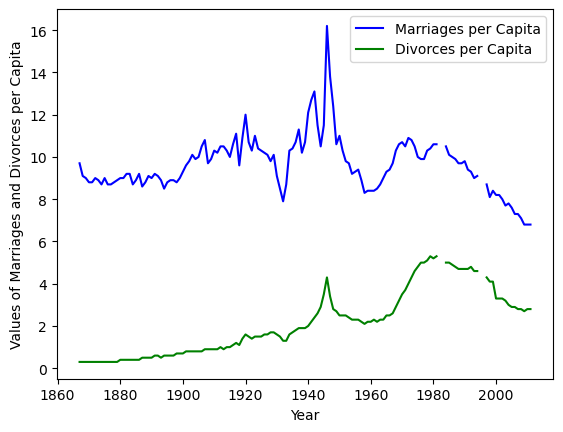

In [38]:
plt.plot(users['Year'], users['Marriages_per_1000'], color='blue',label='Marriages per Capita')        # specify color by name
plt.plot(users['Year'], users['Divorces_per_1000'], color='g',label='Divorces per Capita')
plt.xlabel("Year")
plt.ylabel("Values of Marriages and Divorces per Capita");
plt.legend();

In [39]:
# Question 7
from matplotlib import pyplot as plt
import numpy as np


import pandas as pd
users = pd.read_csv("D:/Python/us-marriages-divorces-1867-2014.csv")
print(users)

     Year  Marriages  Divorces  Population  Marriages_per_1000  \
0    1867   357000.0   10000.0    36970000                 9.7   
1    1868   345000.0   10000.0    37885000                 9.1   
2    1869   348000.0   11000.0    38870000                 9.0   
3    1870   352000.0   11000.0    39905000                 8.8   
4    1871   359000.0   12000.0    41010000                 8.8   
..    ...        ...       ...         ...                 ...   
140  2007  2197000.0  856000.0   301696000                 7.3   
141  2008  2157000.0  844000.0   304543000                 7.1   
142  2009  2080000.0  840000.0   307240000                 6.8   
143  2010  2096000.0  872000.0   309776000                 6.8   
144  2011  2118000.0  877000.0   312034000                 6.8   

     Divorces_per_1000  
0                  0.3  
1                  0.3  
2                  0.3  
3                  0.3  
4                  0.3  
..                 ...  
140                2.8  
141    

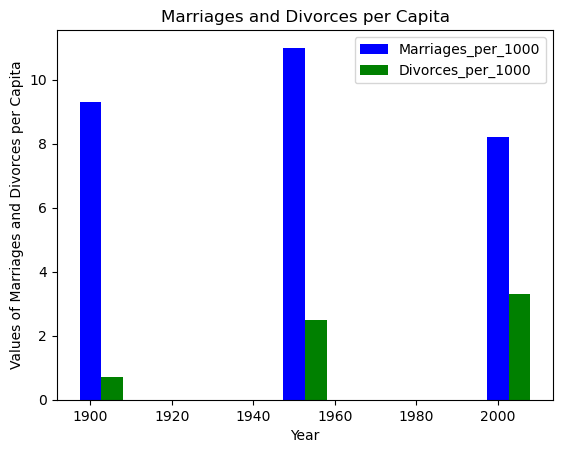

In [40]:
# data to plot
v1=users.loc[users['Year'] == 1900, 'Marriages_per_1000'].iloc[0]
v2= users.loc[users['Year'] == 1950, 'Marriages_per_1000'].iloc[0]
v3=users.loc[users['Year'] == 2000, 'Marriages_per_1000'].iloc[0]


v4=users.loc[users['Year'] == 1900, 'Divorces_per_1000'].iloc[0]
v5= users.loc[users['Year'] == 1950, 'Divorces_per_1000'].iloc[0]
v6=users.loc[users['Year'] == 2000, 'Divorces_per_1000'].iloc[0]

marriages = [v1,v2,v3]
divorces = [v4,v5,v6]

# create plot
fig, ax = plt.subplots()
bar_width = 5.35
X = np.arange(start=1900, stop=2050, step=50)

p1 = plt.bar(X, marriages, bar_width, color='b',
label='Marriages_per_1000')

# The bar of second plot starts where the first bar ends
p2 = plt.bar(X + bar_width, divorces, bar_width,
color='g',
label='Divorces_per_1000')

plt.xlabel('Year')
plt.ylabel('Values of Marriages and Divorces per Capita')
plt.title('Marriages and Divorces per Capita')

plt.legend()


In [42]:
# Question 8
from matplotlib import pyplot as plt
import numpy as np


import pandas as pd
users = pd.read_csv("D:/Python/actor_kill_counts.csv")
print(users)

                   Actor  Count
0  Arnold Schwarzenegger    369
1           Chow Yun-Fat    295
2         Clint Eastwood    207
3             Clive Owen    194
4         Dolph Lundgren    239
5                 Jet Li    201
6           Nicolas Cage    204
7     Sylvester Stallone    267
8    Tomisaburo Wakayama    226
9          Wesley Snipes    193


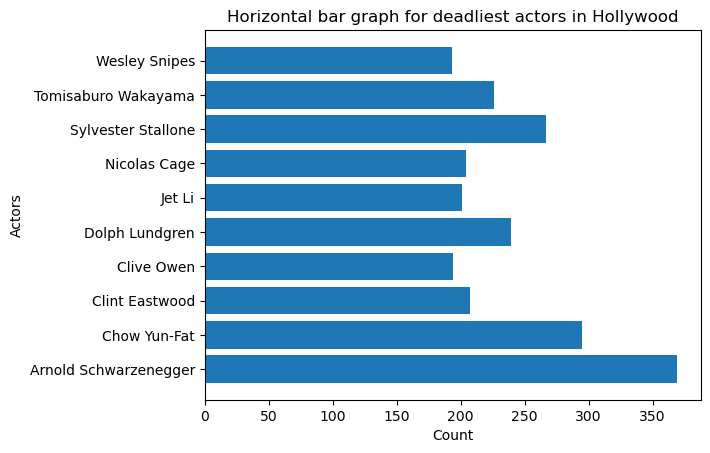

In [43]:
y=users['Actor']


x=users['Count']
plt.barh(y, x)


plt.ylabel("Actors")


plt.xlabel("Count")
plt.title("Horizontal bar graph for deadliest actors in Hollywood")
plt.show()

In [45]:
# Question 9
from matplotlib import pyplot as plt
import numpy as np


import pandas as pd
users = pd.read_csv("D:/Python/roman-emperor-reigns.csv")
print(users)

           Emperor  Length_of_Reign         Cause_of_Death
0         Augustus            40.58  Possibly assassinated
1         Tiberius            22.50  Possibly assassinated
2         Caligula             4.83           Assassinated
3         Claudius            13.75  Possibly assassinated
4             Nero            13.67                Suicide
..             ...              ...                    ...
63   Valentinian I            11.00         Natural causes
64          Valens            14.00       Killed in battle
65         Gratian            16.00           Assassinated
66  Valentinian II            17.00  Possibly assassinated
67    Theodosius I            16.00         Natural causes

[68 rows x 3 columns]


In [46]:
df=users.loc[users['Cause_of_Death']=='Assassinated']

print(df)
#df.groupby('Emperor')['Cause_of_Death'].count()

               Emperor  Length_of_Reign Cause_of_Death
2             Caligula             4.83   Assassinated
5                Galba             0.58   Assassinated
7            Vitellius             0.67   Assassinated
10            Domitian            15.00   Assassinated
17            Commodus            15.00   Assassinated
18            Pertinax             0.25   Assassinated
21           Caracalla            19.00   Assassinated
22                Geta             3.00   Assassinated
24          Elagabalus             3.75   Assassinated
25   Severus Alexander            13.00   Assassinated
26         Maximinus I             3.25   Assassinated
29            Pupienus             0.25   Assassinated
30            Balbinus             0.25   Assassinated
35  Trebonianus Gallus             2.00   Assassinated
36            Aemilian             0.16   Assassinated
38           Gallienus            15.00   Assassinated
41            Aurelian             5.00   Assassinated
43        

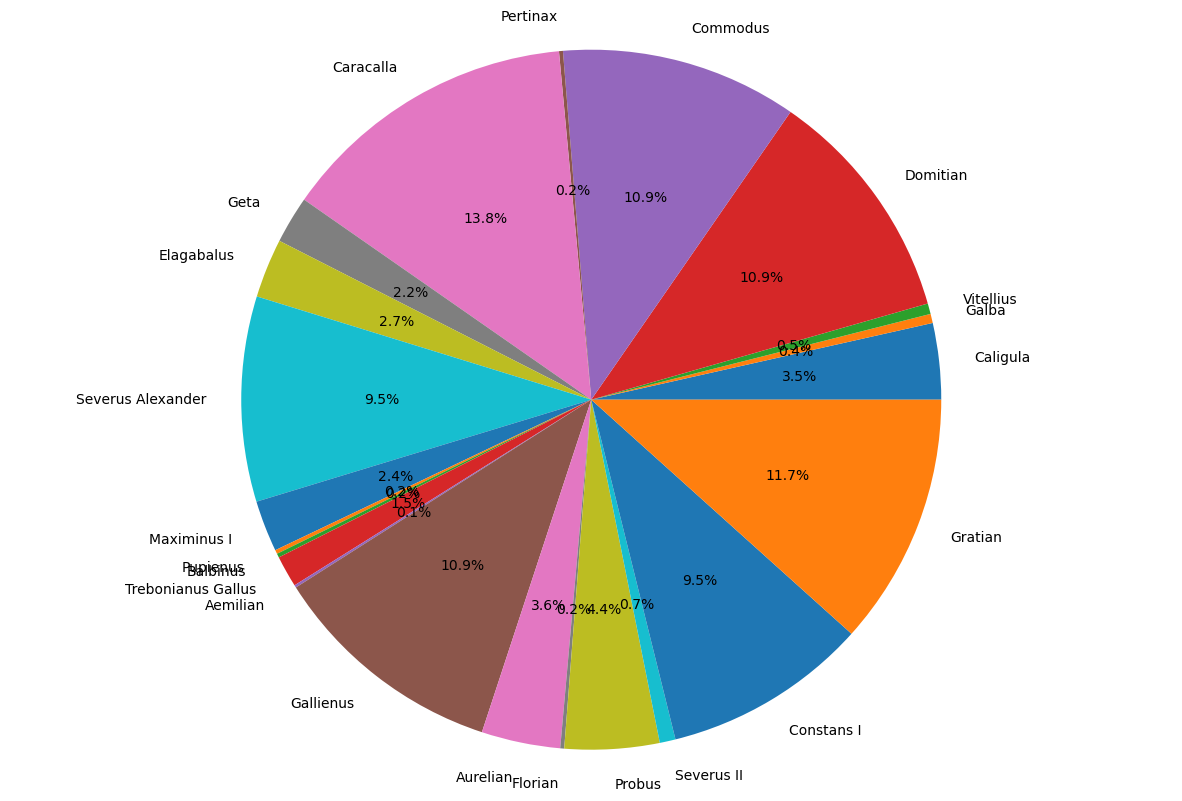

In [47]:
# Creating dataset
label= df['Emperor']

data = df['Length_of_Reign']

# Creating plot
fig = plt.figure(figsize =(15, 10))
plt.pie(data, labels = label,autopct='%1.1f%%')

# show plot
plt.axis('equal')
plt.show()

In [49]:
# Question1 0
from matplotlib import pyplot as plt
import numpy as np


import pandas as pd
users = pd.read_csv("D:/Python/arcade-revenue-vs-cs-doctorates.csv")
print(users)

   Year  Total Arcade Revenue (billions)  \
0  2000                            1.196   
1  2001                            1.176   
2  2002                            1.269   
3  2003                            1.240   
4  2004                            1.307   
5  2005                            1.435   
6  2006                            1.601   
7  2007                            1.654   
8  2008                            1.803   
9  2009                            1.734   

   Computer Science Doctorates Awarded (US)  
0                                       861  
1                                       830  
2                                       809  
3                                       867  
4                                       948  
5                                      1129  
6                                      1453  
7                                      1656  
8                                      1787  
9                                      1611  


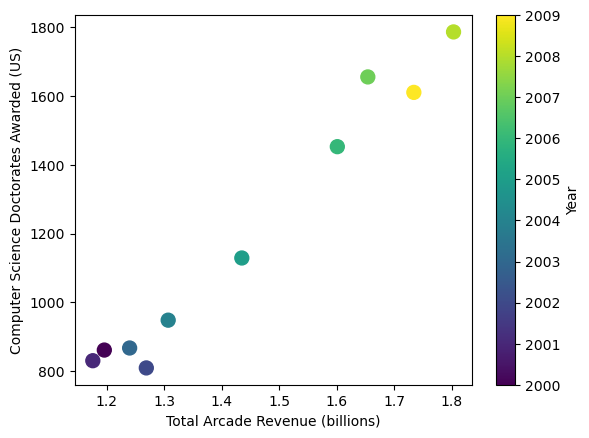

In [50]:
users.plot.scatter(x = 'Total Arcade Revenue (billions)', y = 'Computer Science Doctorates Awarded (US)',s=100,c='Year',colormap='viridis');